In [1]:
import h5py

import pywt
import wavelets

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.cluster import *
from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.entropy import *

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
np.random.seed(0)
N = 64
time_interval = 2 ** 15

callbacks = {}
for i in range(1, N):
    callbacks['W_' + str(i)] = Weight0Callback(time_interval, 0, i)
callbacks['C'] = ClusterCoeffCallback(time_interval=time_interval)
callbacks['K'] = TotalDegreeCallback(time_interval=time_interval)
signal = SwitchSignal([2000, time_interval], [RandomUnitSignal(N), ZeroSignal(N)])
# N, 3, alpha = 0.6, beta = 0.3, gamma = 2.2 - period
# N, 3, alpha = 0.49, beta = 0.3, gamma = 2.2
# alpha = 0.59, beta = 0.3, gamma = 2.2 - trans
# N, 3, alpha = 0.021, beta = 0.3, gamma = 2.2
# N, 3, alpha = 0.027, beta = 0.3, gamma = 2.2
# N, 3, alpha = 0.02735, beta = 0.3, gamma = 2.2 / 3.2
# N, 3, alpha = 0.02734, beta = 0.3, gamma = 2.2 / 3.2
# N, 3, alpha = 0.02736 / 0.02737, beta = 0.3, gamma = 3.2
# N, 3, alpha = 0.02739, beta = 0.3, gamma = 3.2
net = KPNetworkTanhDelayed(N, 3, alpha = 0.59, beta = 0.3, gamma = 2.2)
handler = ComputationHandler(time_interval)
results = handler.run(net, signal, callbacks)

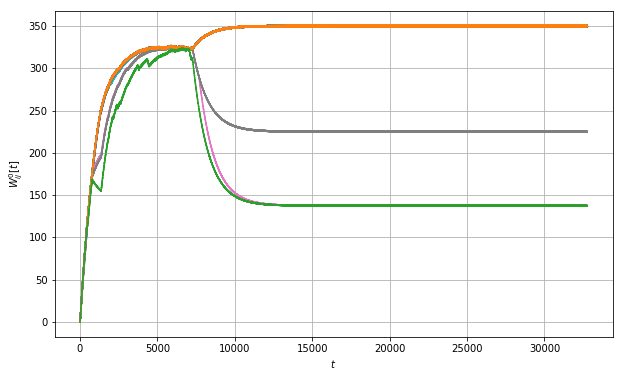

In [28]:
plt.figure(figsize=(10, 6))
for key, value in results.items():
    if key[0] == 'W':
        plt.plot(value)
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

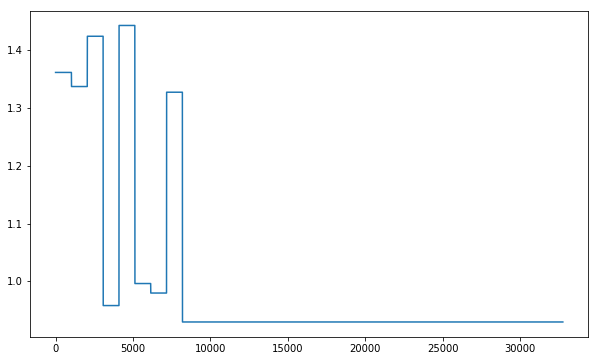

In [29]:
ents = []
chunk = 2 ** 10
for i in range(time_interval // chunk):
    ent = DWTDistribution(results['K'][i * chunk : (i + 1) * chunk], 'db2').entropy
    ents += chunk * [ent]
plt.figure(figsize=(10, 6))
plt.plot(ents)
plt.show()

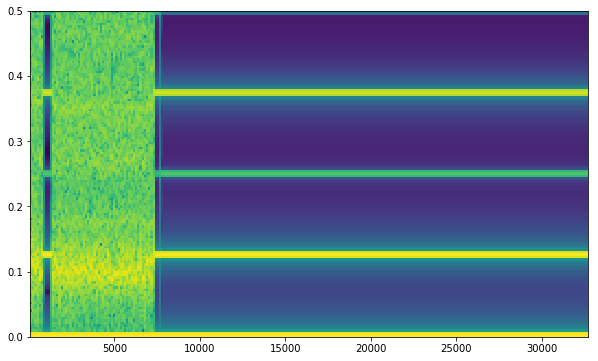

In [30]:
plt.figure(figsize=(10, 6))
plt.specgram(results['K'], NFFT=256, Fs=1, Fc=0)
plt.show()

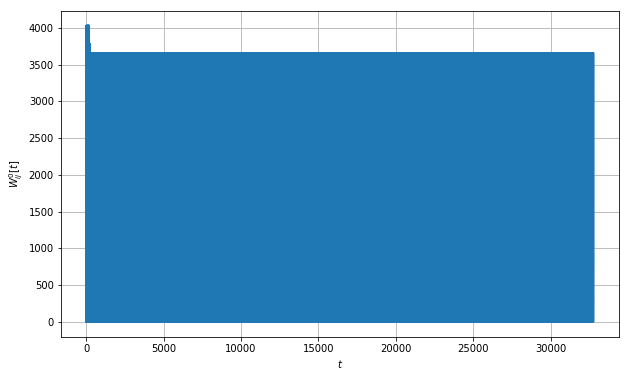

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(results['K'])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

In [ ]:
W = h5py.File('data/hfd5/period1.hfd5', 'r')['W']
plt.figure(figsize=(10, 6))
for i in range(1, N):
    plt.plot(W[0, i])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

In [ ]:
W = h5py.File('data/hfd5/trans2.hfd5', 'r')['W']
plt.figure(figsize=(10, 6))
for i in range(1, N):
    plt.plot(W[0, i])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()

In [ ]:
W = h5py.File('data/hfd5/cluster1.hfd5', 'r')['W']
plt.figure(figsize=(10, 6))
for i in range(1, N):
    plt.plot(W[0, i])
plt.grid(True)
plt.xlabel(r'$t$')
plt.ylabel(r'$W^{0}_{ij}[t]$')
plt.show()